# Fake Reviews Detection
## Objective
Develop a model to identify fake reviews using natural language processing (NLP) and machine learning.
## Problem Statement
Fake reviews distort consumer behavior and affect platform credibility. This project aims to classify reviews as "fake" or "genuine."
### Import libraries

In [1]:
! pip install pandas numpy matplotlib seaborn scikit-learn transformers datasets


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     -------------------------------------- 60.8/60.8 kB 404.8 kB/s eta 0:00:00
     ---------------------------------------- 0.0/44.4 kB ? eta -:--:--
     ---------------------------------------- 44.4/44.4 kB 2.1 MB/s eta 0:00:00
  Using cached datasets-3.2.0-py3-none-any.whl.metadata (20 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
     ---------------------------------------- 0.0/168.5 kB ? eta -:--:--
     --------- ----------------------------- 41.0/168.5 kB 1.9 MB/s eta 0:00:01
     ----------------- ------------------- 81.9/168.5 kB 919.0 kB/s eta 0:00:01
     --------------------------- ---------- 122.9/168.5 kB 1.0 MB/s eta 0:00:01
     ------------------------------------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



   ---------------------------------------  43.8/43.9 MB 2.2 MB/s eta 0:00:01
   ---------------------------------------  43.8/43.9 MB 2.2 MB/s eta 0:00:01
   ---------------------------------------  43.9/43.9 MB 2.2 MB/s eta 0:00:01
   ---------------------------------------  43.9/43.9 MB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 43.9/43.9 MB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.4 MB 1.7 MB/s eta 0:00:02
   --- ------------------------------------ 0.2/2.4 MB 2.2 MB/s eta 0:00:01
   ---- ----------------------------------- 0.3/2.4 MB 2.0 MB/s eta 0:00:02
   ----- ---------------------------------- 0.3/2.4 MB 2.0 MB/s eta 0:00:02
   ------- -------------------------------- 0.4/2.4 MB 1.9 MB/s eta 0:00:02
   -------- ------------------------------- 0.5/2.4 MB 1.9 MB/s eta 0:00:01
   ---------- ----------------------------- 0.6/2.4 MB 1.9 MB/s eta 0:00:01
   -----

In [3]:
! pip install nltk

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached click-8.1.8-py3-none-any.whl (98 kB)



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


True

In [9]:
# Load dataset
data = pd.read_csv("./fake reviews dataset.csv")  
print(data.head())
print(data.info())

             category  rating label  \
0  Home_and_Kitchen_5     5.0    CG   
1  Home_and_Kitchen_5     5.0    CG   
2  Home_and_Kitchen_5     5.0    CG   
3  Home_and_Kitchen_5     1.0    CG   
4  Home_and_Kitchen_5     5.0    CG   

                                               text_  
0  Love this!  Well made, sturdy, and very comfor...  
1  love it, a great upgrade from the original.  I...  
2  This pillow saved my back. I love the look and...  
3  Missing information on how to use it, but it i...  
4  Very nice set. Good quality. We have had the s...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB
None


In [10]:
# Check class distribution
print(data['label'].value_counts())  

label
CG    20216
OR    20216
Name: count, dtype: int64


In [11]:
! pip install datasets


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [12]:
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_All_Beauty", trust_remote_code=True)

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\HP\.cache\huggingface\hub\datasets--McAuley-Lab--Amazon-Reviews-2023. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/hugging

In [13]:
# Convert dataset to DataFrame
df = pd.DataFrame(dataset["full"])

# Display the first few rows to check the structure
df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True
2,5.0,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True
3,1.0,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True
4,5.0,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True


In [14]:
# Check the distribution of the 'rating' column
rating_counts = df['rating'].value_counts()

# Display class distribution
print("Class distribution for 'rating' column:")
print(rating_counts)

Class distribution for 'rating' column:
rating
5.0    420726
1.0    102080
4.0     79381
3.0     56307
2.0     43034
Name: count, dtype: int64


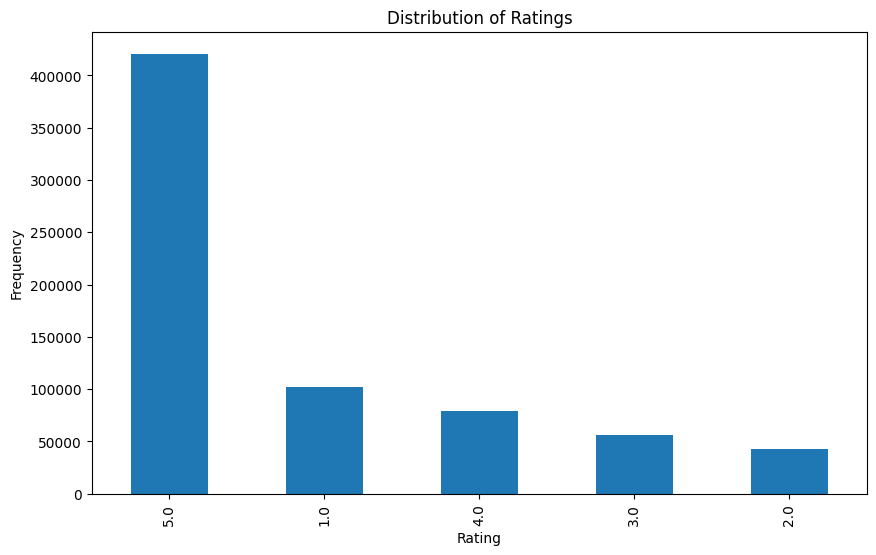

In [15]:
# Plot the distribution
rating_counts.plot(kind='bar', figsize=(10,6))
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()
